<a href="https://colab.research.google.com/github/Clinda02/customer_analysis/blob/main/5_product_category_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 5. 제품 카테고리별 총 매출과 평균 매출 비교


#### 회사 전략
* **매출이 높은 카테고리에 집중**: 매출이 높은 제품 카테고리에 대한 추가적인 투자를 고려하여, 해당 시장 내에서의 점유율을 높이고 수익성을 증대시킬 수 있음.
<br>
* **매출이 낮은 카테고리 분석 및 전략 재검토**: 매출이 낮은 카테고리에 대해서는 시장 조사, 고객 피드백 수집 등을 통해 개선점을 찾고, 제품 개선이나 마케팅 전략을 재검토할 필요가 있음.
<br>
* **제품 포트폴리오 다변화**: 제품 카테고리별 매출 분석을 기반으로, 제품 포트폴리오를 다변화하고 시장 위험을 분산시킬 수 있는 전략을 수립.
<br>
* **타겟 마케팅 전략 개발**: 평균 매출이 높은 카테고리를 대상으로 타겟 마케팅 캠페인을 개발하여, 해당 카테고리의 매출을 더욱 증대시킬 수 있음.
<br>
* **고객 세분화와 맞춤형 제안**: 제품 카테고리별 매출 데이터를 기반으로 고객 세분화를 수행하고, 각 세그먼트별 맞춤형 제품이나 프로모션을 제안하여 고객 만족도와 충성도를 높일 수 있음.



In [ ]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
  host = 'localhost',
  user = 'root',
  password = 'password',
  database = 'classicmodels'
)

# 제품 카테고리별 총 매출과 평균 매출 비교 쿼리
category_sales_query = """
SELECT p.productLine, sum(od.quantityOrdered * od.priceEach) as total_sales,
    avg(od.quantityOrdered * od.priceEach) as average_sales
FROM products p
JOIN orderdetails od ON od.productCode = p.productCode
GROUP BY p.productLine
ORDER BY total_sales DESC
;
"""
category_sales_df = pd.read_sql_query(category_sales_query, conn)
category_sales_df


C:\Users\user\AppData\Local\Temp\ipykernel_2324\1697986585.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  category_sales_df = pd.read_sql_query(category_sales_query, conn)


,productLine,total_sales,average_sales
0,Classic Cars,3853922.49,3815.764842
1,Vintage Cars,1797559.63,2736.011613
2,Motorcycles,1121426.12,3123.749638
3,Trucks and Buses,1024113.57,3325.044058
4,Planes,954637.54,2841.183155
5,Ships,663998.34,2710.197306
6,Trains,188532.92,2327.566914


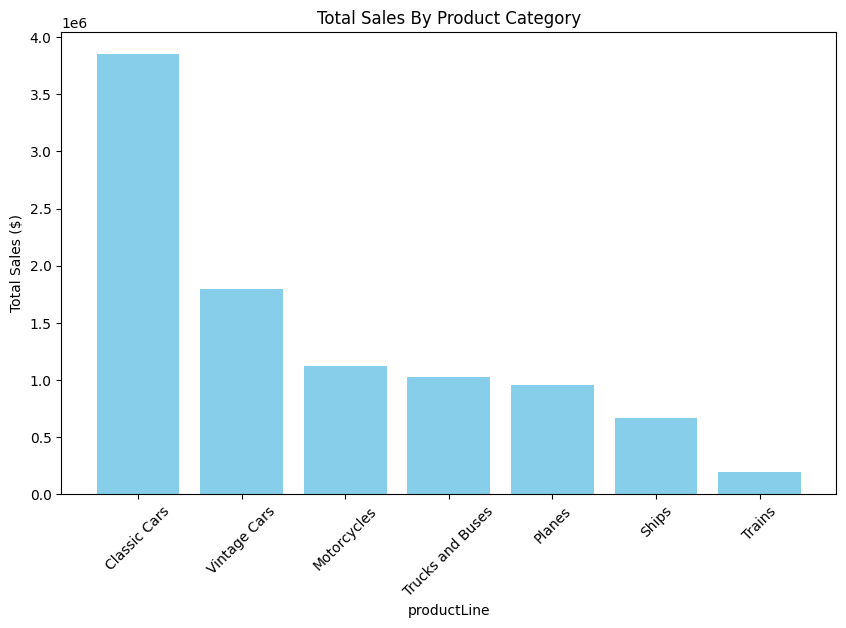

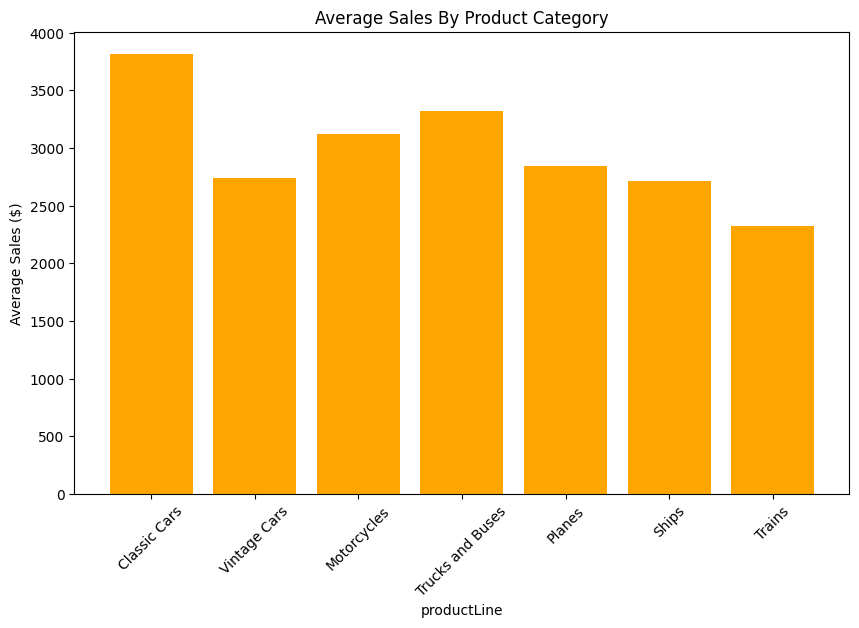

In [ ]:
# 제품 카테고리별 총 매출 시각화
plt.figure(figsize=(10,6))
plt.bar(category_sales_df['productLine'], category_sales_df['total_sales'], color = 'skyblue')
plt.xlabel('productLine')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales By Product Category')
plt.xticks(rotation=45)
plt.show()

# 제품 카테고리별 총 매출 시각화
plt.figure(figsize=(10,6))
plt.bar(category_sales_df['productLine'], category_sales_df['average_sales'], color = 'orange')
plt.xlabel('productLine')
plt.ylabel('Average Sales ($)')
plt.title('Average Sales By Product Category')
plt.xticks(rotation=45)
plt.show()

#### 인사이트 도출
*  총 판매 금액이 높은 상품 카테고리는 **Car**, 낮은 카테고리는 **train**
*  평균 판매 금액도 **Car**이 제일 높음.